## Python questions

Importamos las librerías que vamos a necesitar

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leemos los datos

In [5]:
regresion = pd.read_excel('/Users/pela/Desktop/PROYECTO FINAL/data/regression_data.xls')

Usamos este comando para que nos muestre todas las columnas

In [6]:
pd.set_option('display.max_columns', None)

Visualizamos los primeros datos

In [7]:
regresion.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


Y también la información de cada columna

In [8]:
regresion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

### Eliminamos la columna de date

In [9]:
regresion.drop("date", axis=1, inplace=True)

Confirmamos si se eliminó correctamente

In [10]:
regresion.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### Número de filas

In [11]:
regresion.index

RangeIndex(start=0, stop=21597, step=1)

Vemos que tenemos 21598 filas

### Encontrar valores únicos

#### Columna bedrooms

In [12]:
regresion["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

#### Columna bathrooms


In [13]:
regresion["bathrooms"].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Vemos que hay datos que no son coherentes, como que hay 2,25 baños. Así que hay que hacer unos arreglos

In [14]:
regresion["bathrooms"] = regresion["bathrooms"].astype("int64")

In [15]:
regresion["bathrooms"].unique()

array([1, 2, 3, 4, 0, 5, 6, 8, 7])

#### Columna floors

In [16]:
regresion["floors"].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

Arreglamos los datos también

In [17]:
regresion["floors"] = regresion["floors"].astype("int64")

In [18]:
regresion.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [19]:
regresion["floors"].unique()

array([1, 2, 3])

#### Columna condition

In [20]:
regresion["condition"].unique()

array([3, 5, 4, 1, 2])

#### Columna grade

In [21]:
regresion["grade"].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

### Ordenamos de mayor a menor en función del precio

In [22]:
regresion_sorted = regresion.sort_values("price", ascending=False)

Mostramos los id de las 10 primeras filas que son las casas más caras

In [23]:
regresion_sorted["id"].head(10)

7245    6762700020
3910    9808700762
9245    9208900037
4407    2470100110
1446    8907500070
1313    7558700030
1162    1247600105
8085    1924059029
2624    7738500731
8629    3835500195
Name: id, dtype: int64

### Precio medio de las casas

In [24]:
round(regresion["price"].mean(), 2)

540296.57

### Agrupación

#### Media del precio agrupados por dormitorios

In [25]:
bedrooms_price = regresion.groupby("bedrooms")["price"].mean()
round(bedrooms_price, 2)

bedrooms
1      318239.46
2      401387.75
3      466276.59
4      635564.68
5      786874.13
6      825853.50
7      951447.82
8     1105076.92
9      893999.83
10     820000.00
11     520000.00
33     640000.00
Name: price, dtype: float64

#### Media de sqft_living agrupados por dormitorios

In [26]:
bedrooms_living = regresion.groupby("bedrooms")["sqft_living"].mean()
round(bedrooms_living, 2)

bedrooms
1      888.15
2     1239.75
3     1805.84
4     2554.65
5     3047.55
6     3284.34
7     3974.21
8     3800.00
9     3775.00
10    3706.67
11    3000.00
33    1620.00
Name: sqft_living, dtype: float64

#### Media del precio con y sin waterfront

In [27]:
waterfront = regresion.groupby("waterfront")["price"].mean()
round(waterfront, 2)

waterfront
0     531762.32
1    1662524.18
Name: price, dtype: float64

#### Correlacion entre condition y grade

In [28]:
regresion[["condition", "grade"]].corr()

,condition,grade
condition,1.000000,-0.146896
grade,-0.146896,1.000000


Vemos que hay muy poca correlacion entre ellos, y que además es una correlación negativa

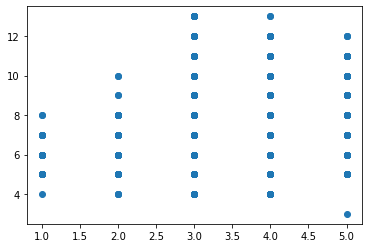

In [29]:
x = regresion["condition"]
y = regresion["grade"]
plt.scatter(x, y)
plt.show()

#### Número de casas en cada categoría

In [30]:
houses_condition = regresion.groupby("condition").sum()
houses_condition

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
condition,,,,,,,,,,,,,,,,,,,
1,140730119470,74,31,36190,643057,31,1,9,173,34040,2150,55983,1992,2844751,1379.7869,-3545.929,52460,275357,9890950
2,708512183727,486,210,241540,5560098,189,1,13,1112,212910,28630,331315,7906,16675669,8079.2444,-20780.794,269537,3333736,55790389
3,65137361487580,47342,25963,30131861,206747281,22221,91,2990,109739,26733240,3398621,27751920,1471221,1375062649,666852.9679,-1713286.650,28655203,175235613,7601266264
4,25306064741895,19063,8756,11078148,90949053,6801,50,1496,41911,9032357,2045791,11117553,269808,556757620,269922.8534,-693886.078,10793644,77781741,2959842755
5,7631834660318,5886,2849,3440972,22202442,1987,20,552,12453,2615779,825193,3310909,73259,166848837,80920.4758,-207955.929,3134195,18914202,1041994740


### Búsqueda de casas con determinadas características

In [31]:
houses = regresion[regresion["bedrooms"].isin([3, 4])]

In [32]:
houses = houses[houses["bathrooms"].apply(lambda x: x > 3)]

In [33]:
houses = houses[houses["floors"].isin([1])]

In [34]:
houses = houses[houses["waterfront"].isin([0])]

In [35]:
houses = houses[houses["condition"].apply(lambda x: x >= 3)]

In [36]:
houses = houses[houses["grade"].apply(lambda x: x >= 5)]

In [37]:
houses = houses[houses["price"].apply(lambda x: x < 300000)]

In [38]:
houses

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [39]:
regresion[((regresion.bedrooms == 3) | (regresion.bedrooms == 4)) & (regresion.bathrooms > 3) & (regresion.floors == 1) & (regresion.waterfront == 0) & (regresion.condition >= 3) & (regresion.grade >= 5) & (regresion.price <= 300000)]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


### Casas con el precio que duplica la media

In [40]:
mean = regresion["price"].mean()
mean = round(mean, 2)

In [41]:
price = regresion[regresion["price"].apply(lambda x: x > mean)]

### Diferencia de precio con 3 y 4 dormitorios

In [42]:
houses = regresion[(regresion.bedrooms == 3) | (regresion.bedrooms == 4)]
houses.groupby("bedrooms")["price"].mean()

bedrooms
3    466276.590900
4    635564.677129
Name: price, dtype: float64

### Diferentes localizaciones

In [43]:
regresion.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

### Casas que fueron reformadas

In [44]:
regresion[regresion.yr_renovated != 0]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
1,6414100192,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
35,9547205180,3,2,2300,3060,1,0,0,3,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264,696000
95,1483300570,4,2,3300,10250,1,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045,905000
103,2450000295,3,2,2920,8113,2,0,0,3,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113,1090000
115,3626039325,3,3,4380,6350,2,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,740500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,7351200295,3,1,1760,6788,2,1,4,3,7,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588,1150000
20041,126039256,3,2,1520,5040,2,0,0,3,7,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710,434900
20428,4305600360,4,2,2400,9612,1,0,0,3,8,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539,500012
20431,3319500628,3,1,1010,1546,2,0,0,3,8,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517,356999


### Datos de la casa 11 más cara

In [45]:
regresion_sorted.iloc[11]

id               6.447300e+09
bedrooms         4.000000e+00
bathrooms        5.000000e+00
sqft_living      7.080000e+03
sqft_lot         1.657300e+04
floors           2.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            1.200000e+01
sqft_above       5.760000e+03
sqft_basement    1.320000e+03
yr_built         2.008000e+03
yr_renovated     0.000000e+00
zipcode          9.803900e+04
lat              4.761510e+01
long            -1.222240e+02
sqft_living15    3.140000e+03
sqft_lot15       1.599600e+04
price            4.000000e+06
Name: 4145, dtype: float64